# ***ASSIGNMENT 1***
SUBJECT : IT702 - DEEP LEARNING


---


> **SYBMITTED BY : SHANKARANARAYAN N, M.TECH(RESEARCH), DEPARTMENT OF INFORMATION TECHNOLOGY**






---



# ***SOURCE CODE::***

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

**THE FOLLOWING CODE IS USED TO CONNECT GOOGLE DRIVE AND GOOGLE COLAB**  


---



In [ ]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1-TZ0OYbZEwKBIcJiPh4IbDjyymc27BMp'})
downloaded.GetContentFile('data4.csv')

**DATA DESCTIPTION**


---



In [ ]:
data = pd.read_csv('data4.csv')
data.head()

,lifeexp,age,sex,bmi,children,smoker,region,BMI,charges
0,36.3,35,1,35.860,2,0,1,44.2,5836.52040
1,45.3,28,1,25.935,1,0,2,15.4,4133.64165
2,45.3,40,0,29.900,2,0,0,12.6,6600.36100
3,45.6,18,1,33.880,0,0,1,17.2,11482.63485
4,45.6,19,1,30.590,2,0,2,16.8,24059.68019


In [ ]:
data.describe()

,lifeexp,age,sex,bmi,children,smoker,region,BMI,charges
count,1336.000000,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,69.750225,39.193114,0.49476,30.673177,1.095060,0.205090,1.483533,38.067515,13276.019562
std,9.665135,14.049996,0.50016,6.094841,1.205769,0.403918,1.105532,19.474377,12117.796317
min,36.300000,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000,1.400000,1121.873900
25%,62.875000,26.750000,0.00000,26.308750,0.000000,0.000000,1.000000,19.400000,4733.635288
50%,72.650000,39.000000,0.00000,30.400000,1.000000,0.000000,1.000000,44.400000,9382.033000
75%,76.800000,51.000000,1.00000,34.700000,2.000000,0.000000,2.000000,55.900000,16687.364100
max,89.000000,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000,67.000000,63770.428010


**THE FOLLOWING CODE COMPUTES THE COST FUNCTION**

---



In [ ]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

**THE FOLLOWING CODE COMPUTES THE GRADIENT DESCENT**


---



In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J=[]
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        #error = np.sum(predictions -y)
        descent=alpha * 1/m * error
        theta-=descent
        J.append(computeCost(X,y,theta))
    return theta, J

**THE FOLLOWING CODE COMPUTES FEATURE NORMALISATION**


---



In [ ]:
def featureNormalization(X):
    mean=np.mean(X,axis=0) #mean  
    std=np.std(X,axis=0) #standard deviation
    X_norm = (X - mean)/std #notmalizing X
    return X_norm , mean , std

**THE VALUE OF X AND Y IS INITIALIZED HERE**


---



In [ ]:
data_n2=data.values
m2=len(data_n2[:,-1]) 
X=data_n2[:,0:8].reshape(m2,8) 
print("\t\nX BEFORE NORMALISATION\n",X)
X, mean_X, std_X = featureNormalization(X)
y=data_n2[:,-1].reshape(m2,1)
print("\t\nY VALUE\n",y) 
print("\t\nX AFTER NORMALISATION\n",X)

	
X BEFORE NORMALISATION
 [[36.3 35.   1.  ...  0.   1.  44.2]
 [45.3 28.   1.  ...  0.   2.  15.4]
 [45.3 40.   0.  ...  0.   0.  12.6]
 ...
 [89.  18.   0.  ...  0.   1.  58.6]
 [89.  39.   1.  ...  0.   3.  61.9]
 [89.  46.   0.  ...  0.   2.  57.6]]
	
Y VALUE
 [[5836.5204 ]
 [4133.64165]
 [6600.361  ]
 ...
 [2304.0022 ]
 [7986.47525]
 [9301.89355]]
	
X AFTER NORMALISATION
 [[-3.46221247 -0.29855411  1.01053453 ... -0.50794071 -0.43753965
   0.3150181 ]
 [-2.53068174 -0.79696146  1.01053453 ... -0.50794071  0.46734112
  -1.16440195]
 [-2.53068174  0.05745115 -0.98957529 ... -0.50794071 -1.34242043
  -1.30823445]
 ...
 [ 1.9924175  -1.50897198 -0.98957529 ... -0.50794071 -0.43753965
   1.05472813]
 [ 1.9924175  -0.0137499   1.01053453 ... -0.50794071  1.37222189
   1.22424501]
 [ 1.9924175   0.48465745 -0.98957529 ... -0.50794071  0.46734112
   1.00335937]]


**VISUALIZING DATASET**


---








SPLITTING THE COLUMNS

In [ ]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

In [ ]:
a=data_n2[:,0].reshape(m2,1)
b=data_n2[:,1].reshape(m2,1)
c=data_n2[:,2].reshape(m2,1)
d=data_n2[:,3].reshape(m2,1)
e=data_n2[:,4].reshape(m2,1)
f=data_n2[:,5].reshape(m2,1)
g=data_n2[:,6].reshape(m2,1)
h=data_n2[:,7].reshape(m2,1)

g1=list(map(int,g))
c1=list(map(int,c))
e1=list(map(int,e))
f1=list(map(int,f))
y1=list(map(int, y))

PLOTTING DATA

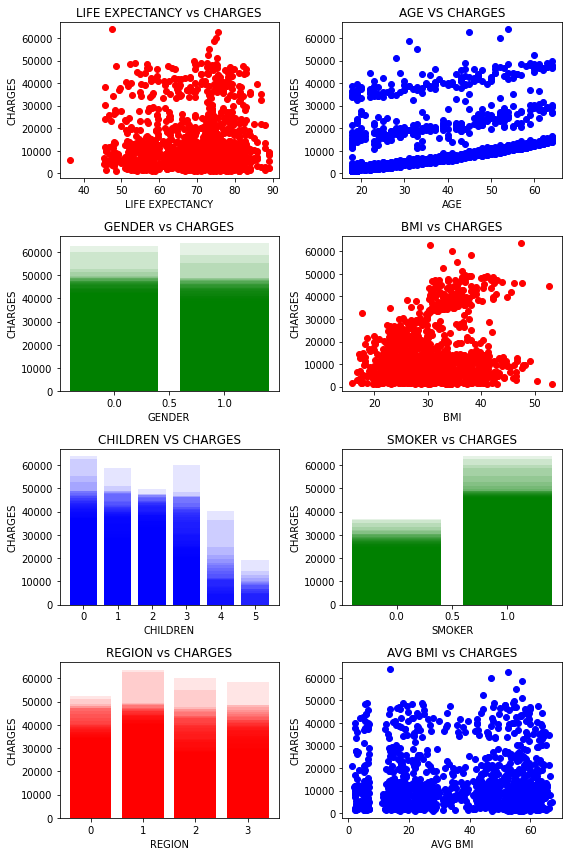

In [ ]:
fig, axes = plt.subplots(figsize=(8,12),nrows=4,ncols=2)
axes[0,0].scatter(a,y,color="r")
axes[0,0].plot(a, PolyCoefficients(a, y))
axes[0,0].set_xlabel("LIFE EXPECTANCY")
axes[0,0].set_ylabel("CHARGES")
axes[0,0].set_title("LIFE EXPECTANCY vs CHARGES")

axes[0,1].scatter(b,y,color="b")
axes[0,1].set_xlabel("AGE")
axes[0,1].set_ylabel("CHARGES")
axes[0,1].set_title("AGE VS CHARGES")

axes[1,0].bar(c1,y1,align='center',alpha=0.1,color="g")
axes[1,0].set_xlabel("GENDER")
axes[1,0].set_ylabel("CHARGES")
axes[1,0].set_title("GENDER vs CHARGES")

axes[1,1].scatter(d,y,color="r")
axes[1,1].set_xlabel("BMI")
axes[1,1].set_ylabel("CHARGES")
axes[1,1].set_title("BMI vs CHARGES")

axes[2,0].bar(e1,y1,align='center',alpha=0.1,color="b")
axes[2,0].set_xlabel("CHILDREN")
axes[2,0].set_ylabel("CHARGES")
axes[2,0].set_title("CHILDREN VS CHARGES")

axes[2,1].bar(f1,y1,align='center',alpha=0.1,color="g")
axes[2,1].set_xlabel("SMOKER")
axes[2,1].set_ylabel("CHARGES")
axes[2,1].set_title("SMOKER vs CHARGES")


axes[3,0].bar(g1,y1,align='center',alpha=0.1,color="r")
axes[3,0].set_xlabel("REGION")
axes[3,0].set_ylabel("CHARGES")
axes[3,0].set_title("REGION vs CHARGES")

axes[3,1].scatter(h,y,color="b")
axes[3,1].set_xlabel("AVG BMI")
axes[3,1].set_ylabel("CHARGES")
axes[3,1].set_title("AVG BMI vs CHARGES")

plt.tight_layout()



#HERE I AM DISCUSSING 4 DIFFERENT CASES COMPARING THE LEARNING RATE AND ITERATIONS IN GRADIENT DESCENT 

**CASE 1 : THETA REACHES OPTIMUM VALUE [LEARNING RATE=0.01]    [ITERATIONS=1000]**


---

*IN THIS CASE THE THETA REACHES ITS GLOBAL OPTIMUM WITH MINIMUM NUMBER OF STEPS AND ITERATION*


*   THETA is initialized to zero.
*   Learningrate is initialized to 0.01
*   Number of Iteration is initialized to 1000
*   gradientDescent() function is invoked.







THETA [[ -39.16710942]
 [3611.20379199]
 [  59.17403198]
 [2024.52614773]
 [ 576.70026648]
 [9615.65967567]
 [ 389.46461201]
 [ -63.28204861]]

J[]= [160384142.38395026, 159298933.32161537, 158235794.299934, 157194270.50385696, 156173916.63942057, 155174296.7306091, 154194983.92065313, 153235560.27766415, 152295616.604508, 151374752.25282252, 150472574.94108585, 149588700.57664517, 148722753.08161715, 147874364.22257343, 147043173.4439265, 146228827.70493376, 145430981.32023853, 144649295.8038694, 143883439.7166211, 143133088.51674122, 142397924.4138496, 141677636.22601798, 140971919.23994076, 140280475.0741271, 139603011.54504815, 138939242.53617352, 138288887.86983335, 137651673.18184298, 137027329.79882962, 136415594.61820084, 135816209.99069726, 135228923.60547137, 134653488.3776376, 134089662.33823912, 133537208.52657764, 132995894.88485472, 132465494.15507343, 131945783.77815096, 131436545.79519334, 130937566.75088504, 130448637.59894694, 129969553.6096175, 129500114.2791122, 129

Text(0.5, 1.0, 'Cost function using Gradient Descent')

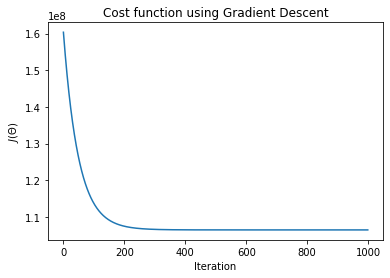

In [ ]:
#BEST CASE THETA REACHING OPTIMUM
theta=np.zeros((8,1))
theta, J = gradientDescent(X,y,theta,0.01,1000)
print("THETA",theta)
print("\nJ[]=",J)
print("\n")
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**CASE 2 : THETA REACHES OPTIMUM VALUE AFTER A LONG TIME [LEARNING RATE=0.01]    [ITERATIONS=5000]**


---
*   THETA is initialized to zero.
*   Learningrate is initialized to 0.001
*   Number of Iteration is initialized to 5000
*   gradientDescent() function is invoked.







THETA [[ -21.91262189]
 [3585.81983011]
 [  32.19785611]
 [2016.28734457]
 [ 579.85312132]
 [9542.44930417]
 [ 379.24975278]
 [ -88.94323933]]

J[]= [161380599.34235644, 161269540.11747414, 161158707.88488817, 161048102.17437646, 160937722.51670656, 160827568.44363376, 160717639.4878989, 160607935.1832262, 160498455.06432125, 160389198.66686884, 160280165.5275308, 160171355.1839441, 160062767.17471856, 159954401.03943485, 159846256.31864235, 159738332.55385715, 159630629.28756, 159523146.0631941, 159415882.4251631, 159308837.91882914, 159202012.09051073, 159095404.48748052, 158989014.6579636, 158882842.15113518, 158776886.5171187, 158671147.3069836, 158565624.07274362, 158460316.36735457, 158355223.7447122, 158250345.7596504, 158145681.96793914, 158041231.92628238, 157936995.19231611, 157832971.3246064, 157729159.88264737, 157625560.42685914, 157522172.51858595, 157418995.72009414, 157316029.59457016, 157213273.70611864, 157110727.61976027, 157008390.90143016, 156906263.11797547, 15680

Text(0.5, 1.0, 'Cost function using Gradient Descent')

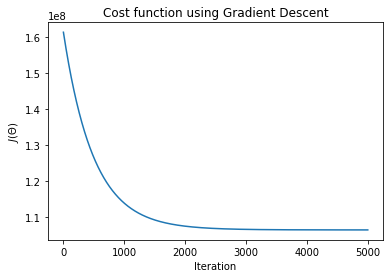

In [ ]:
theta=np.zeros((8,1)) #RESETTING
theta, J = gradientDescent(X,y,theta,0.001,5000)
print("THETA",theta)
print("\nJ[]=",J)
print("\n")
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**CASE 3 : THETA REACHES OPTIMUM VALUE VERY SOON [LEARNING RATE=0.1]    [ITERATIONS=1000]**


---
*   THETA is initialized to zero.
*   Learningrate is initialized to 0.1
*   Number of Iteration is initialized to 1000
*   gradientDescent() function is invoked.







THETA [[ -43.53649201]
 [3611.10273984]
 [  59.76033399]
 [2024.74718401]
 [ 576.62880557]
 [9616.49569033]
 [ 389.78010869]
 [ -58.81670903]]

J[]= [150926773.27562746, 142408887.99302202, 135536895.24444416, 129989212.30326207, 125507903.04239829, 121885888.32317899, 118956773.56743535, 116586746.10816623, 114668112.44376823, 113114137.02903177, 111854915.68876311, 110834072.6823469, 110006114.35618573, 109334306.86449136, 108788972.6734116, 108346122.07836796, 107986352.99237639, 107693965.76285695, 107456250.49397731, 107262912.87595451, 107105611.31068912, 106977583.53514634, 106873345.263975, 106788446.82504742, 106719276.5230721, 106662901.67747942, 106616940.05270089, 106579455.82016136, 106548875.33210132, 106523918.90375592, 106503545.5370945, 106486908.11192243, 106473317.04715218, 106462210.81924762, 106453132.03447413, 106445708.00126368, 106439634.95044635, 106434665.21371205, 106430596.8020005, 106427264.9316441, 106424535.13188359, 106422297.63677196, 106420462.82063372

Text(0.5, 1.0, 'Cost function using Gradient Descent')

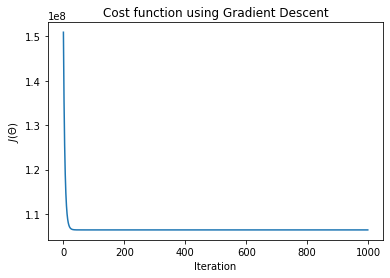

In [ ]:
theta=np.zeros((8,1)) #RESETTING
theta, J = gradientDescent(X,y,theta,0.1,1000)
print("THETA",theta)
print("\nJ[]=",J)
print("\n")
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**CASE 4 : ABNORMAL REACTION [LEARNING RATE=10]    [ITERATIONS=1000]**


---
*   THETA is initialized to zero.
*   Learningrate is initialized to 100
*   Number of Iteration is initialized to 1000
*   gradientDescent() function is invoked.

**WE CAN NOTICE J[] BOUNCING BETWEEN HIGHER AND LOWER VALUES WITHOUT REACHING THE GLOBAL MINIMA**


THETA [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

J[]= [4740541452.063589, 417390277353.89526, 41555806711143.41, 4814009436265396.0, 6.80340643703186e+17, 1.1752515402670042e+20, 2.35849044583508e+22, 5.167469315507609e+24, 1.1837115923295106e+27, 2.7693240462579584e+29, 6.542619964355793e+31, 1.5527487601546385e+34, 3.6929452229293535e+36, 8.791855673091869e+38, 2.0940961548892326e+41, 4.988997294910023e+43, 1.1887181183924287e+46, 2.8324908010649315e+48, 6.7494748250463365e+50, 1.6083380302818929e+53, 3.832548037250897e+55, 9.132703226735306e+57, 2.176265194150231e+60, 5.185906179780364e+62, 1.2357700914041828e+65, 2.944766052926471e+67, 7.017201749570738e+69, 1.6721573873229144e+72, 3.984651582288006e+74, 9.495187818558899e+76, 2.262646820871913e+79, 5.3917529091843935e+81, 1.2848226783977325e+84, 3.0616560963604635e+86, 7.295744552432332e+88, 1.7385325755635606e+91, 4.142819824538595e+93, 9.872093477495743e+95, 2.3524612162508655e+98, 5.6057752964622024e+100, 1.33582

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Cost function using Gradient Descent')

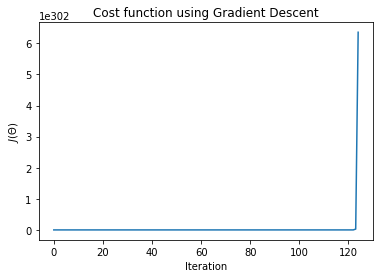

In [ ]:
theta=np.zeros((8,1)) #RESETTING
theta, J = gradientDescent(X,y,theta,10,1000)
print("THETA",theta)
print("\nJ[]=",J)
print("\n")
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**PREDICTION WITH LINEAR REGRESSION**

In [ ]:
#PREDICTION
p=[100,15,1,20,0,1,2,25] #Dummy input
pdt=np.dot(p,theta) #Predicted result
print(pdt) #Printing

[99293.23409259]
